This time we will be implementing an RNN model.

Time series forcasting is an important topic in Machine Learning.\
In this, we will are given the data for sunspots from jan 1749 to dec 1983.\
we will be dividing this data in to two parts, one for training our model and second for testing our model.\
In time series forcasting, we will have to take continuous data and not randomized data, because we have to predict on the basis of given past data.

In [2]:
import pandas as pd
import numpy as np

We will have to take the data from the url given.

You have to implement the get_train_test function and return train_data and test_data, scaled in the range [0,1]

To scale the data, read on MinMaxScalar class in sklearn.preprocessing

Testing data should be the first 80 percent values and rest should be testing data. Also, convert the index of the data to datetime

In [19]:
from sklearn.preprocessing import MinMaxScaler
def get_train_test(url):
    df = pd.read_csv(url, index_col='Month', parse_dates=True)
    df.index.freq = 'MS'

    N = len(df)
    Tp = int(N*0.8)

    train = df.iloc[:Tp]
    test = df.iloc[Tp:]

    scaler = MinMaxScaler()
    scaler.fit(train)
    train_data = scaler.transform(train)
    test_data = scaler.transform(test)

    # Clamping the test data values to the range [0,1]
    test_data = np.clip(test_data, 0, 1)
    
    return train_data, test_data
    pass

Now we will take the data from your implemented function :)

In [20]:
sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data, test_data = get_train_test(sunspots_url)

# print(train_data)
# print(test_data)

X_train = train_data[:-1]
y_train = train_data[1:]

X_test = test_data[:-1]
y_test = test_data[1:]

Now let's make the model for our computations.

The model will consist of a layer of RNN of 64 nodes followed by a layer of Feed Forward Neural Network of one output node.

For compiling the node, we will use mean squared error as loss and mean absolute error as metric. We will not use accuracy as the metric. Think on why :)

In [29]:
# make the model .... all the best
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(units=64, input_shape=(1, 1), activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model.summary()

# train the model on the X_train dataset
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=1)

# predict the values for training and testing data
train_predict = model.predict(X_train_reshaped)
test_predict = model.predict(X_test_reshaped)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_6 (SimpleRNN)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step - loss: 0.0290 - mean_absolute_error: 0.1205 
Epoch 2/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 0.0068 - mean_absolute_error: 0.0628
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0045 - mean_absolute_error: 0.0494
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - loss: 0.0045 - mean_absolute_error: 0.0479
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - loss: 0.0042 - mean_absolute_error: 0.0460
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - loss: 0.0045 - mean_absolute_error: 0.0470
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 0.0041 - mean_absolute_error: 0.0461
Epoch 8/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 0.0046 - mean_absolute_error: 0.0479
Epoch 9/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 0.0046 - mean_absolute_error: 0.0474
Epoch 10/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 0.0044 - mean_absolute_error: 0.0472
Epoch 11/50
71/71 ━━━━━━━━━━━━

Now let's print out what you have done :)

Train RMSE: 0.067 RMSE
Test RMSE: 0.089 RMSE


Text(0.5, 1.0, 'Actual and Predicted Values. The Red Line Separates The Training And Test Examples')

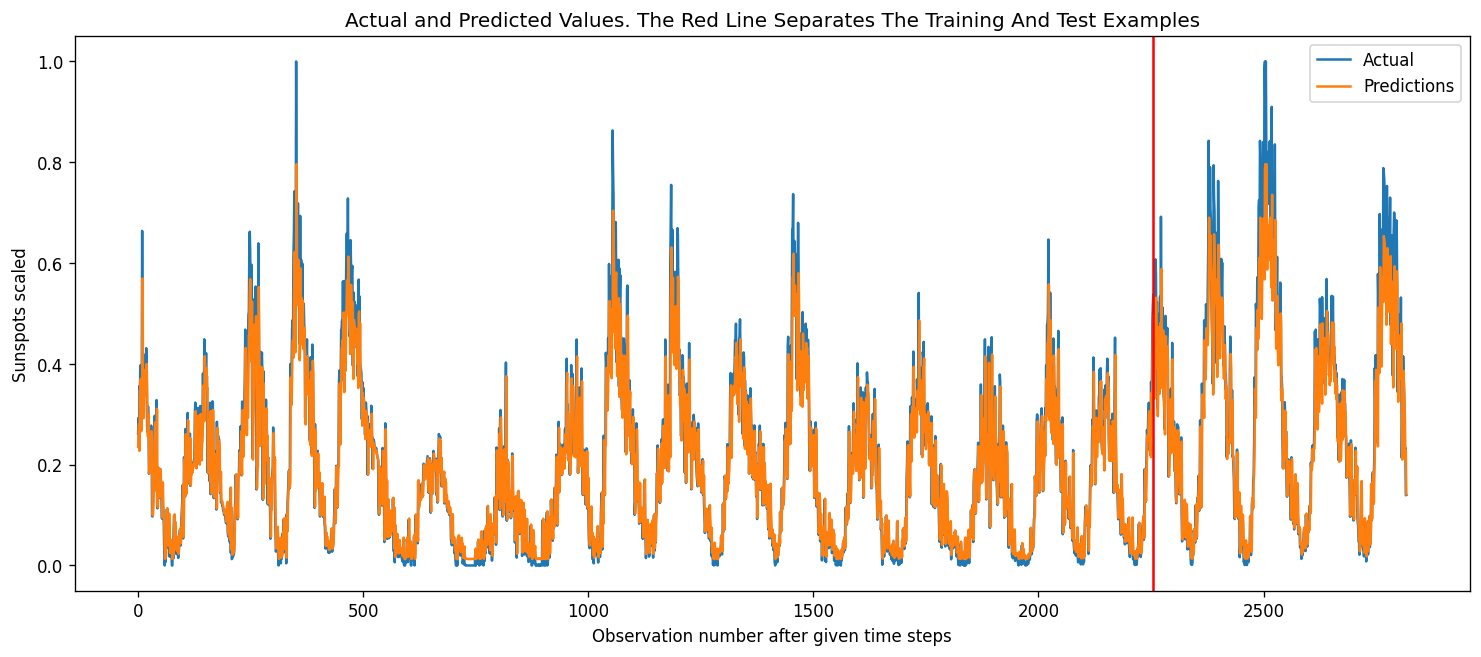

In [30]:
import math
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

   
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))
# Print RMSE
print('Train RMSE: %.3f RMSE' % (train_rmse))
print('Test RMSE: %.3f RMSE' % (test_rmse))    

actual = np.append(y_train, y_test)
predictions = np.append(train_predict, test_predict)
rows = len(actual)
plt.figure(figsize=(15, 6), dpi=120)
plt.plot(range(rows), actual)
plt.plot(range(rows), predictions)
plt.axvline(x=len(y_train), color='r')
plt.legend(['Actual', 'Predictions'])
plt.xlabel('Observation number after given time steps')
plt.ylabel('Sunspots scaled')
plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')